# **Fortnite Weapon Attribute Dataset**

This dataset has attributes for all available weapons in Fortnite: Battle Royale as of patch 2.1.0 or as of January 10th 2018.

**The dataset features the following columns:**  
Name: Name of the weapon  
DPS: The damage per second of the weapon  
Damage: The damage done by the weapon  
Critical %: The critical hit chance of the weapon  
Crit. Damage: The critical hit damage of the weapon  
Fire Rate: The fire rate of the weapon  
Mag. Size: The size of the magazine of the weapon  
Range: The range of the weapon  
Durability: The durability of the weapon  
Reload Time: The reload time of the weapon  
Ammo Cost: The cost in ammunition to fire a single projectile  
Impact: The impact of the weapon i.e. the damage it does to buildings  
Rarity: The rarity of the weapon  
Type: What type of weapon is in question  
   
In total there are 14 attribute columns with 43 weapon rows, leaving a total of 473 entries into the Dataset

By: Mathushan Shanthan

In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fortnite-battle-royale-weapon-attributes/Fortnite_BR_Weapon_Attributes.csv


# **1. Data Import**

**Import Dataset:**

In [15]:
# Reading the dataset into a Pandas DataFrame
df = pd.read_csv('/kaggle/input/fortnite-battle-royale-weapon-attributes/Fortnite_BR_Weapon_Attributes.csv', sep=';')

**Display Dataframe as HTML Table:**

The code segment utilizes the IPython.display library within a Jupyter Notebook environment to create a visually appealing HTML table representation of a DataFrame. This is achieved by calling the to_html() method on the DataFrame, with the option to exclude the index column for a cleaner presentation. The resulting HTML content is then rendered and displayed using the display(HTML(...)) function, allowing for the convenient visualization of tabular data in a structured format.

In [16]:
# Create an HTML table representation of the DataFrame
from IPython.display import display, HTML

table_html = df.to_html(index=False)
display(HTML(table_html))

Name,DPS,Damage,Critical %,Crit. Damage,Fire Rate,Mag. Size,Range,Durability,Reload Time,Ammo Cost,Impact,Rarity,Type
Scar,198.0,36,0,0,5.50,30,1.000,?,2.1,1,31,Legendary,Assault Rifles
Scar,192.5,35,0,0,5.50,30,1.000,?,2.1,1,29,Epic,Assault Rifles
Scoped Rifle,84.0,24,0,0,3.50,20,1.000,?,2.2,1,29,Epic,Assault Rifles
Scoped Rifle,80.5,23,0,0,3.50,20,1.000,?,2.3,1,28,Rare,Assault Rifles
M4,181.5,33,0,0,5.50,30,1.000,?,2.2,1,28,Rare,Assault Rifles
M4,170.5,31,0,0,5.50,30,1.000,?,2.2,1,27,Uncommon,Assault Rifles
M4,165.0,30,0,0,5.50,30,1.000,?,2.3,1,25,Common,Assault Rifles
Burst Rifle,121.9,30,0,0,4.06,30,1.000,?,2.6,1,44,Rare,Assault Rifles
Burst Rifle,117.9,29,0,0,4.06,30,1.000,?,2.7,1,42,Uncommon,Assault Rifles
Burst Rifle,109.7,27,0,0,4.06,30,1.000,?,2.9,1,40,Common,Assault Rifles


# 2. DATA PROCESSING

**Handling Missing Values:**

Missing values represented by the '?' character in the 'Durability' column of the dataset are addressed. First, the '?' characters are replaced with the numerical value 0 to ensure uniformity in the data. Next, the 'Durability' column is converted to a numeric data type, and any non-numeric values are treated as 'NaN' (Not-a-Number) using the 'coerce' option. Finally, the missing values are imputed by calculating the mean durability value from the column. This approach effectively handles missing data in the 'Durability' column, replacing them with a suitable average value, making the dataset more suitable for analysis.







In [17]:
# In my dataset, it appears that missing values are denoted by the '?' character in the 'Durability' column. I replaced these with a suitable value by filling them with the mean or median of the column.
df['Durability'] = df['Durability'].replace('?', 0)
df['Durability'] = pd.to_numeric(df['Durability'], errors='coerce')
mean_durability = df['Durability'].mean()
print("Mean Durability:", mean_durability)

Mean Durability: 0.0


The DataFrame containing the dataset is displayed as an HTML table to gain a visual understanding of its structure and to inspect its contents. This table representation provides an organized view of the data for better comprehension. Additionally, a check for missing values is performed using the isnull().sum() method, which counts and displays the number of missing values in each column. This step is crucial for identifying any data gaps or areas that may require further data cleaning or imputation.

In [18]:
# Displaying the DataFrame to understand its structure and check for missing values
table_html = df.to_html(index=False)
display(HTML(table_html))
print(df.isnull().sum())

Name,DPS,Damage,Critical %,Crit. Damage,Fire Rate,Mag. Size,Range,Durability,Reload Time,Ammo Cost,Impact,Rarity,Type
Scar,198.0,36,0,0,5.50,30,1.000,0,2.1,1,31,Legendary,Assault Rifles
Scar,192.5,35,0,0,5.50,30,1.000,0,2.1,1,29,Epic,Assault Rifles
Scoped Rifle,84.0,24,0,0,3.50,20,1.000,0,2.2,1,29,Epic,Assault Rifles
Scoped Rifle,80.5,23,0,0,3.50,20,1.000,0,2.3,1,28,Rare,Assault Rifles
M4,181.5,33,0,0,5.50,30,1.000,0,2.2,1,28,Rare,Assault Rifles
M4,170.5,31,0,0,5.50,30,1.000,0,2.2,1,27,Uncommon,Assault Rifles
M4,165.0,30,0,0,5.50,30,1.000,0,2.3,1,25,Common,Assault Rifles
Burst Rifle,121.9,30,0,0,4.06,30,1.000,0,2.6,1,44,Rare,Assault Rifles
Burst Rifle,117.9,29,0,0,4.06,30,1.000,0,2.7,1,42,Uncommon,Assault Rifles
Burst Rifle,109.7,27,0,0,4.06,30,1.000,0,2.9,1,40,Common,Assault Rifles


Name            0
DPS             0
Damage          0
Critical %      0
Crit. Damage    0
Fire Rate       0
Mag. Size       0
Range           0
Durability      0
Reload Time     0
Ammo Cost       0
Impact          0
Rarity          0
Type            0
dtype: int64


# 3. Data Cleaning

**Cleaning Dataset:**

Data preprocessing steps are applied to two columns of the dataset. Firstly, any leading or trailing spaces in the 'Name' column are removed to ensure consistent formatting. Secondly, the 'Critical %' column, which contains percentage values, is converted to numeric values by first changing its data type to a string and then removing the '%' sign from each entry. This transformation allows for numerical calculations and analysis on the 'Critical %' column while ensuring data integrity and consistency.

In [19]:
# Removed any leading/trailing spaces in the 'Name' column and converted percentage values to numeric values by removing the '%' sign from the 'Critical %' column
df['Critical %'] = df['Critical %'].astype(str)
df['Critical %'] = df['Critical %'].str.rstrip('%').astype(float)



The DataFrame containing the dataset is displayed as an HTML table to gain a visual understanding of its structure and to inspect its contents. This table representation provides an organized view of the data for better comprehension. Additionally, a check for missing values is performed using the isnull().sum() method, which counts and displays the number of missing values in each column. This step is crucial for identifying any data gaps or areas that may require further data cleaning or imputation.

In [20]:
# Displaying the DataFrame to understand its structure and check for missing values
table_html = df.to_html(index=False)
display(HTML(table_html))
print(df.isnull().sum())

Name,DPS,Damage,Critical %,Crit. Damage,Fire Rate,Mag. Size,Range,Durability,Reload Time,Ammo Cost,Impact,Rarity,Type
Scar,198.0,36,0.0,0,5.50,30,1.000,0,2.1,1,31,Legendary,Assault Rifles
Scar,192.5,35,0.0,0,5.50,30,1.000,0,2.1,1,29,Epic,Assault Rifles
Scoped Rifle,84.0,24,0.0,0,3.50,20,1.000,0,2.2,1,29,Epic,Assault Rifles
Scoped Rifle,80.5,23,0.0,0,3.50,20,1.000,0,2.3,1,28,Rare,Assault Rifles
M4,181.5,33,0.0,0,5.50,30,1.000,0,2.2,1,28,Rare,Assault Rifles
M4,170.5,31,0.0,0,5.50,30,1.000,0,2.2,1,27,Uncommon,Assault Rifles
M4,165.0,30,0.0,0,5.50,30,1.000,0,2.3,1,25,Common,Assault Rifles
Burst Rifle,121.9,30,0.0,0,4.06,30,1.000,0,2.6,1,44,Rare,Assault Rifles
Burst Rifle,117.9,29,0.0,0,4.06,30,1.000,0,2.7,1,42,Uncommon,Assault Rifles
Burst Rifle,109.7,27,0.0,0,4.06,30,1.000,0,2.9,1,40,Common,Assault Rifles


Name            0
DPS             0
Damage          0
Critical %      0
Crit. Damage    0
Fire Rate       0
Mag. Size       0
Range           0
Durability      0
Reload Time     0
Ammo Cost       0
Impact          0
Rarity          0
Type            0
dtype: int64


# 4. DATA VISUALISATION

**Display the Epic rarity weapons in a table sorted by their damage values:**

Data analysis and presentation are performed on a dataset of Fortnite Battle Royale weapon attributes. First, the data is loaded into a Pandas DataFrame, and then a filter is applied to select weapons with 'Epic' rarity. Subsequently, the filtered DataFrame is sorted in descending order based on the 'Damage' attribute, arranging the 'Epic' rarity weapons from highest to lowest damage. To enhance the presentation, an HTML table is created using the Pandas to_html() method, applying CSS classes for styling. Finally, the HTML table is displayed within the Jupyter Notebook using IPython's HTML function. This code snippet allows for a clear and organized representation of 'Epic' rarity weapons sorted by damage, aiding in data exploration and visualization.

In [21]:
import pandas as pd
from IPython.display import HTML

df = pd.read_csv('/kaggle/input/fortnite-battle-royale-weapon-attributes/Fortnite_BR_Weapon_Attributes.csv', sep=';')

# Filter for Epic rarity weapons
epic_weapons = df[df['Rarity'] == 'Epic']

# Sort the DataFrame by 'Damage' column in descending order
epic_weapons_sorted = epic_weapons.sort_values(by='Damage', ascending=False)

# Create an HTML table
epic_table = epic_weapons_sorted.to_html(classes='table table-striped', index=False)

# Display the HTML table
HTML(epic_table)


Name,DPS,Damage,Critical %,Crit. Damage,Fire Rate,Mag. Size,Range,Durability,Reload Time,Ammo Cost,Impact,Rarity,Type
Rocket Launcher,87.0,116,0,0,0.75,1,1.000,?,2.2,1,2100,Epic,Explosives
Bolt-Action Sniper,36.3,110,0,0,0.33,1,1.000,?,2.8,1,378,Epic,Sniper Rifles
Grenade Launcher,105.0,105,0,0,1.00,6,1.000,?,2.8,1,788,Epic,Explosives
Tactical Shotgun,111.0,74,0,0,1.50,8,3.072,?,5.7,1,336,Epic,Shotguns
Auto Sniper,75.6,63,0,0,1.20,10,1.000,?,2.5,1,105,Epic,Sniper Rifles
Scar,192.5,35,0,0,5.50,30,1.000,?,2.1,1,29,Epic,Assault Rifles
Silenced Pistol,175.5,26,0,0,6.75,16,1.000,?,1.3,1,25,Epic,Pistols
Scoped Rifle,84.0,24,0,0,3.50,20,1.000,?,2.2,1,29,Epic,Assault Rifles
Tactical Submachine Gun,180.0,18,0,0,10.00,30,1.000,?,2.2,1,29,Epic,Submachine Guns


**Display the Top 5 best gun for short-distance fights based on the DPS:**

An analysis is performed on a dataset containing Fortnite Battle Royale weapon attributes. The dataset is initially loaded into a Pandas DataFrame from a CSV file. Then, a filter is applied to select weapons suitable for short-distance fights based on specific criteria, such as minimum damage, maximum reload time, and minimum magazine size. The resulting DataFrame is sorted in descending order based on 'DPS' (Damage Per Second), and only the top 5 weapons are selected. To improve data presentation, an HTML table is generated using the Pandas to_html() method, applying CSS classes for styling. Finally, the HTML table is displayed using IPython's HTML function, providing a clear and organized representation of the top 5 weapons suited for short-distance combat, aiding in data exploration and decision-making for Fortnite players.

In [22]:
import pandas as pd
from IPython.display import HTML

# Create a DataFrame from a CSV file
df = pd.read_csv('/kaggle/input/fortnite-battle-royale-weapon-attributes/Fortnite_BR_Weapon_Attributes.csv', sep=';')

# Filter for weapons suitable for short-distance fights
short_distance_weapons = df[
    (df['Damage'] >= 15) &
    (df['Reload Time'] <= 3) &
    (df['Mag. Size'] >= 20)
]

# Sort the filtered DataFrame by DPS in descending order
short_distance_weapons_sorted = short_distance_weapons.sort_values(by='DPS', ascending=False)

# Slice the DataFrame to show only the top 5 weapons
top_5_short_distance_weapons = short_distance_weapons_sorted.head(5)

# Create an HTML table
short_distance_table = top_5_short_distance_weapons.to_html(classes='table table-striped', index=False)

# Display the HTML table
HTML(short_distance_table)


Name,DPS,Damage,Critical %,Crit. Damage,Fire Rate,Mag. Size,Range,Durability,Reload Time,Ammo Cost,Impact,Rarity,Type
Submachine Gun,240.0,16,0,0,15.0,35,1.0,?,2.0,1,28,Rare,Submachine Guns
Submachine Gun,225.0,15,0,0,15.0,35,1.0,?,2.1,1,27,Uncommon,Submachine Guns
Scar,198.0,36,0,0,5.5,30,1.0,?,2.1,1,31,Legendary,Assault Rifles
Scar,192.5,35,0,0,5.5,30,1.0,?,2.1,1,29,Epic,Assault Rifles
M4,181.5,33,0,0,5.5,30,1.0,?,2.2,1,28,Rare,Assault Rifles


**Distribution of Damage values, showing how frequently different damage values occur in the dataset:**

A histogram is created to visualize the distribution of the 'Damage' attribute within the Fortnite Battle Royale weapon dataset. The matplotlib and seaborn libraries are utilized for data visualization. The histogram is configured to have 10 bins and includes a Kernel Density Estimation (KDE) curve for a smoother representation of the data distribution. The x-axis represents the 'Damage,' while the y-axis indicates the frequency of values falling within each bin. The resulting visualization provides insights into the distribution of damage values among the weapons, allowing for a better understanding of this crucial attribute in the dataset.







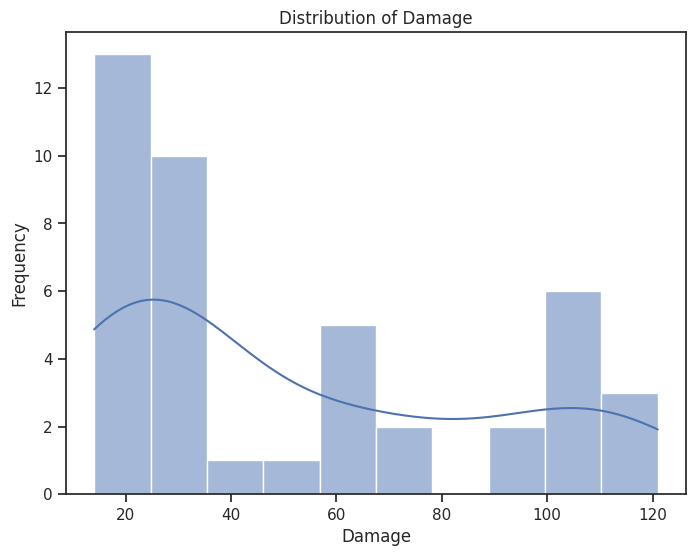

In [23]:
# Histogram for a numeric column ('Damage'):
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['Damage'], bins=10, kde=True)
plt.xlabel('Damage')
plt.ylabel('Frequency')
plt.title('Distribution of Damage')
plt.show()


**Bar plot that shows the distribution of weapon rarities:**

A bar plot is created to visualize the distribution of weapon rarities within the Fortnite Battle Royale weapon dataset. The matplotlib and seaborn libraries are employed for data visualization. The x-axis represents the 'Rarity' categories, while the y-axis displays the count of weapons in each rarity category. To enhance readability, the x-axis labels are rotated by 45 degrees. This bar plot provides an informative overview of the distribution of weapon rarities, allowing for a quick assessment of the variety and availability of weapons of different rarities in the dataset.

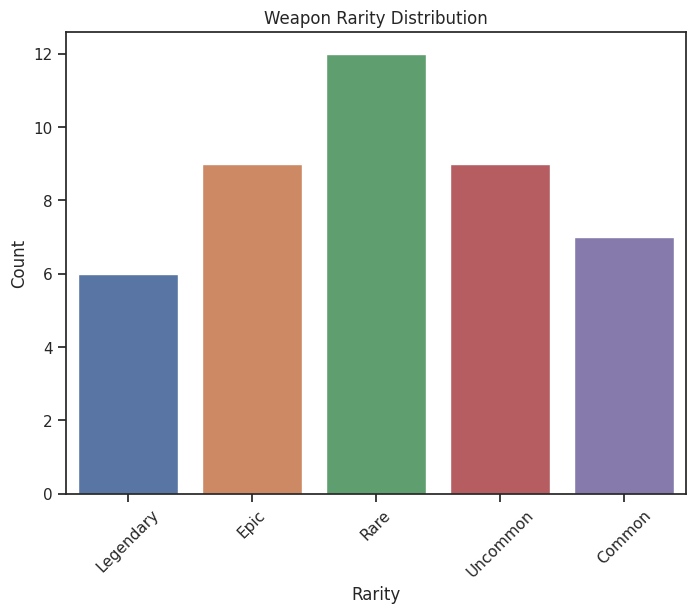

In [24]:
# Bar plot for a categorical column ('Rarity'):
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Rarity')
plt.xlabel('Rarity')
plt.ylabel('Count')
plt.title('Weapon Rarity Distribution')
plt.xticks(rotation=45)
plt.show()


**Relationship between 'Damage' and 'Fire Rate':**

A scatter plot is created to visualize the relationship between two numeric attributes, 'Damage' and 'Fire Rate,' within the Fortnite Battle Royale weapon dataset. The matplotlib and seaborn libraries are utilized for data visualization. The x-axis represents the 'Damage,' while the y-axis represents the 'Fire Rate.' Each data point in the scatter plot corresponds to a weapon in the dataset, allowing for the examination of how these attributes are distributed and potentially identifying any patterns or trends. This scatter plot aids in understanding the trade-off between damage and fire rate among the weapons in the dataset.

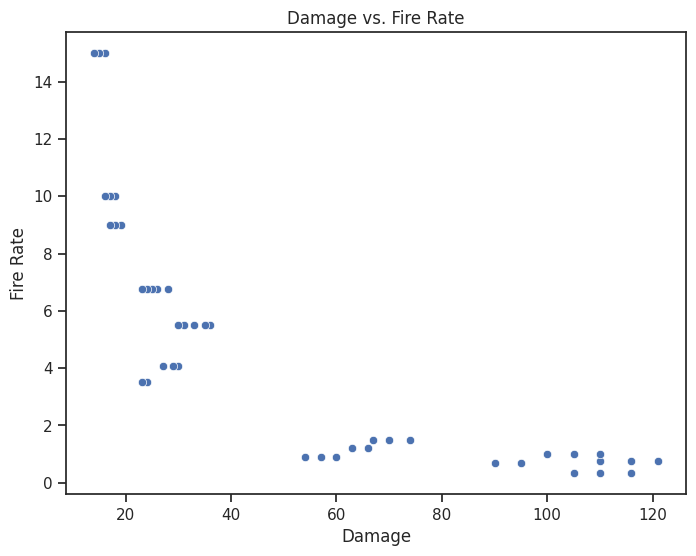

In [25]:
# Scatter plot for two numeric columns ('Damage' vs. 'Fire Rate'):
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Damage', y='Fire Rate')
plt.xlabel('Damage')
plt.ylabel('Fire Rate')
plt.title('Damage vs. Fire Rate')
plt.show()


**Scatterplot matrix to identify patterns, correlations, and potential insights in the data:**

A scatterplot matrix, often referred to as a pair plot, is generated using the seaborn library. The numeric attributes of interest, including 'DPS,' 'Damage,' 'Critical %,' 'Crit. Damage,' 'Fire Rate,' 'Mag. Size,' 'Range,' 'Durability,' 'Reload Time,' 'Ammo Cost,' and 'Impact,' are selected for analysis. The pair plot visualizes all pairwise combinations of these attributes, providing a matrix of scatterplots that reveal potential correlations and patterns. This analysis facilitates a deeper understanding of how different attributes interact with each other in the dataset.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


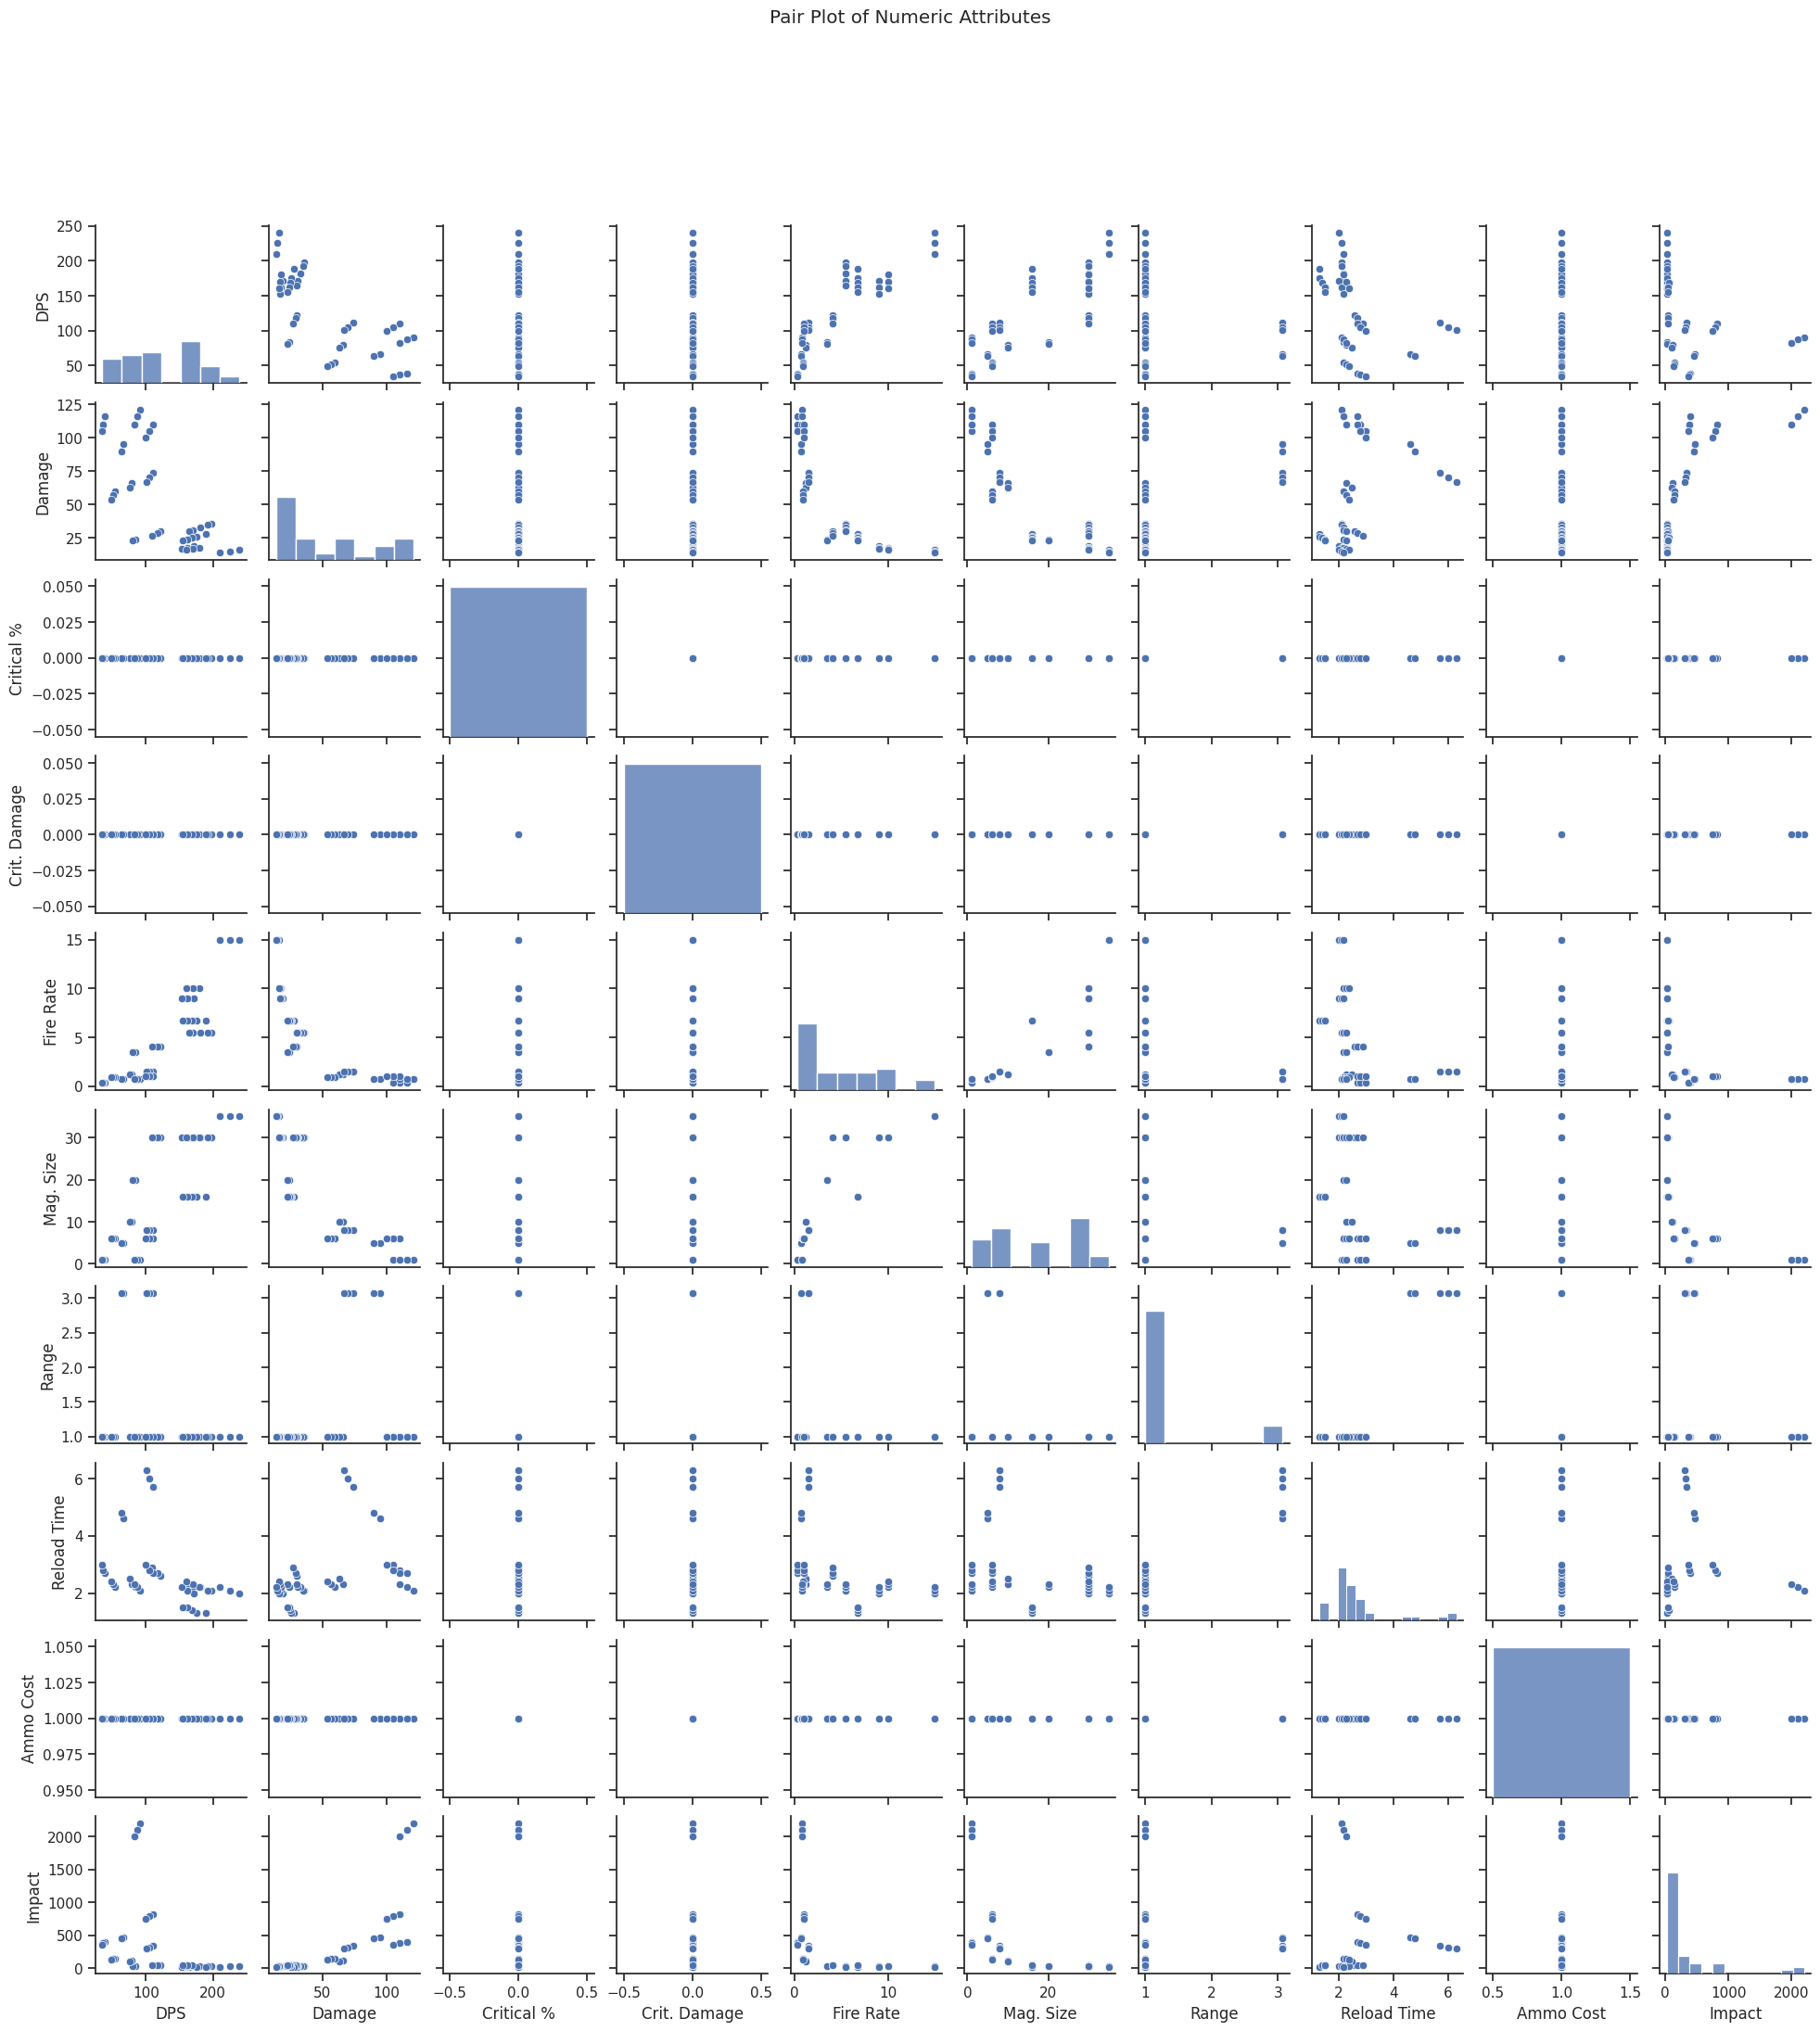

In [26]:
# Combined multiple aspects of my dataset. In this example, I have created a scatterplot matrix (pair plot) using Seaborn to visualise the relationships between various numeric attributes in my dataset.
numeric_columns = ['DPS', 'Damage', 'Critical %', 'Crit. Damage', 'Fire Rate', 'Mag. Size', 'Range', 'Durability', 'Reload Time', 'Ammo Cost', 'Impact']
sns.set(style="ticks")
sns.pairplot(df[numeric_columns], height=2)
plt.suptitle("Pair Plot of Numeric Attributes", y=1.1)
plt.show()


**Group similar weapons together based on their attributes**

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is applied to the Fortnite Battle Royale weapon attributes dataset. The dataset is loaded from a CSV file, and specific features, including 'DPS,' 'Damage,' and 'Fire Rate,' are selected for clustering analysis. DBSCAN is initialized with user-defined parameters such as 'eps' (density threshold) and 'min_samples' (minimum number of data points in a neighborhood), which can be adjusted based on the data characteristics. The algorithm is then fitted to the selected features, and cluster labels are assigned to each data point. To visualize the resulting clusters, a scatter plot is created with 'DPS' on the x-axis and 'Damage' on the y-axis, using different colors to represent each cluster. Additionally, the code counts the number of clusters, excluding noise points.

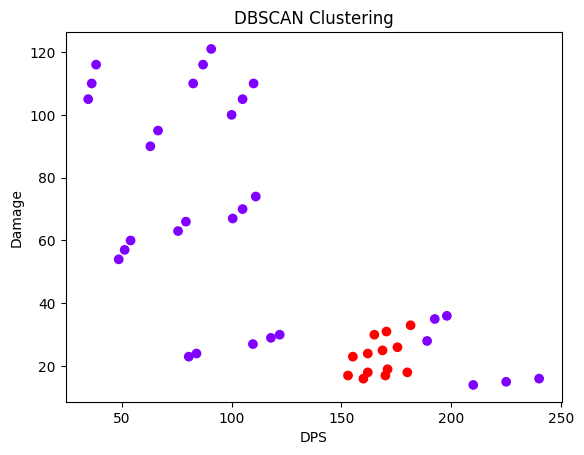

Number of clusters: 2


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

# Load your data from the CSV file
df = pd.read_csv('/kaggle/input/fortnite-battle-royale-weapon-attributes/Fortnite_BR_Weapon_Attributes.csv', sep=';')

# Select the features you want to use for clustering
selected_features = df[["DPS", "Damage", "Fire Rate"]]

# Initialize DBSCAN
dbscan = DBSCAN(eps=10, min_samples=5)  # You can adjust 'eps' and 'min_samples' based on your data

# Fit DBSCAN to your data and get cluster labels
df['Cluster'] = dbscan.fit_predict(selected_features)

# Visualize the clusters
plt.scatter(df['DPS'], df['Damage'], c=df['Cluster'], cmap='rainbow')
plt.xlabel('DPS')
plt.ylabel('Damage')
plt.title('DBSCAN Clustering')
plt.show()

# Count the number of clusters (excluding noise points)
num_clusters = len(set(df['Cluster'])) - (1 if -1 in df['Cluster'] else 0)
print(f"Number of clusters: {num_clusters}")
